### Question 4

#### Import relevant packages

In [ ]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

#### (a) Load the dataset `mnist_corrupted/zigzag` from `tensorflow_datasets`. [**2 points**]

In [ ]:
import tensorflow_datasets as tfds

## write your code here
dataset_name = "mnist_corrupted/zigzag"
train_images, train_labels = tfds.as_numpy(tfds.load(
    dataset_name,
    split='train',
    batch_size=-1,
    as_supervised=True,
))

test_images, test_labels   = tfds.as_numpy(tfds.load(
    dataset_name,
    split='test',
    batch_size=-1,
    as_supervised=True,
))

In [ ]:
# Test size of different loaded numpy arrays
print('Image size:', train_images[0].shape)
print('Training data size:',train_images.shape)
print('Testing data size:', test_images.shape)

Image size: (28, 28, 1)
Training data size: (60000, 28, 28, 1)
Testing data size: (10000, 28, 28, 1)


#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN (atleast 90% accuracy). [**2 points**]

In [ ]:
model = tf.keras.Sequential()
outputs = 10
## write your code here to build your dense ANN. Input layer is created below
model.add(layers.Flatten(input_shape=(train_images[0].shape)))
model.add(layers.Dense(128, activation=tf.nn.relu))      # hidden layer
model.add(layers.Dense(128, activation=tf.nn.relu))      # hidden layer
model.add(layers.Dense(128, activation=tf.nn.relu))      # hidden layer
model.add(layers.Dense(outputs, activation=tf.nn.softmax))   # output layer

#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [10]

What is the activation function of your output layer? [softmax]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [sparse categorical crossentropy]

In [ ]:
### write your code here to compile model
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metric)
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
### write your code here to train your model
# Run the stochastic gradient descent for specified epochs
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2513 - accuracy: 0.8187
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.9112
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2462 - accuracy: 0.9272
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2066 - accuracy: 0.9391
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1843 - accuracy: 0.9456
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1619 - accuracy: 0.9520
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1491 - accuracy: 0.9560
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1337 - accuracy: 0.9609
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1254 - accuracy: 0.9634
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.118

#### (e) Plot the training loss across the different epochs [**1 point**]

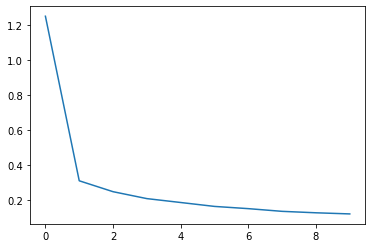

In [ ]:
plt.plot(history.history['loss'])

#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**1 point**]

In [ ]:
#### write your code to report overall accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2172 - accuracy: 0.9526
Test accuracy: 0.9526000022888184


What is the overall accuracy? [0.95260]

In [ ]:
### write your code to report per-class accuracy
### Use confusion matrix from sklearn.

from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model.predict(test_images)
cm = confusion_matrix(test_labels, np.argmax(test_predictions,axis=1))
per_class_accuracy = np.diag(cm) / cm.sum(axis=1)
print(per_class_accuracy)
print(np.mean(per_class_accuracy))

313/313 [==============================] - 1s 2ms/step
[0.97959184 0.99207048 0.92926357 0.95049505 0.95315682 0.95852018
 0.96033403 0.942607   0.95379877 0.90386521]
0.9523702953063417


**Code to visualize the predictions**

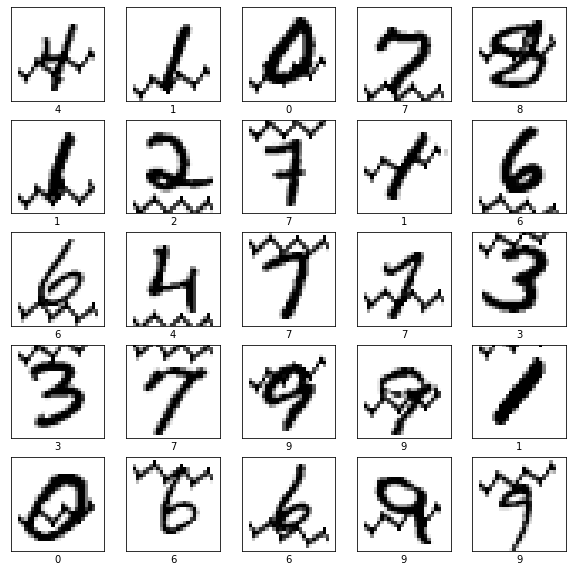

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    #print(train_labels[i][0])
    plt.xlabel(class_names[train_labels[i]])